In [52]:
# Import necessary libraries
import sqlite3 # Import SQLite for SQL database storage
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Enable inline plots
%matplotlib inline

In [53]:
# Load CSV File & Store in SQLite Database
csv_file_path = "loan_dataset.csv"
original_loan_df = pd.read_csv(r"C:\Users\info\Desktop\loan_approval_ml_proj4\loan_dataset.csv")

In [54]:
# Create SQLite connection and store the dataset
conn = sqlite3.connect("loan_dataset.db")
original_loan_df.to_sql("loan_data", conn, if_exists="replace", index=False)

52000

In [55]:
# Retrieve data from SQLite database
query = "SELECT * FROM loan_data"
df = pd.read_sql(query, conn)

In [56]:
# Display basic statistics and first few rows
print(df.describe())
print(df.head(10))

       Applicant_ID           Age    Dependents  Annual_Income  \
count  52000.000000  52000.000000  52000.000000   52000.000000   
mean   26000.500000     38.898385      1.498000   83588.474404   
std    15011.251336     10.553928      1.118077   35720.851522   
min        1.000000     18.000000      0.000000   20009.000000   
25%    13000.750000     31.000000      0.000000   55564.000000   
50%    26000.500000     38.000000      1.000000   78839.000000   
75%    39000.250000     45.000000      2.000000  114226.000000   
max    52000.000000     69.000000      3.000000  149998.000000   

       Monthly_Expenses  Credit_Score  Existing_Loans  \
count      52000.000000  52000.000000    52000.000000   
mean        2748.064885    678.089019        0.997865   
std         1295.678763    159.990367        0.815586   
min          500.000000    300.000000        0.000000   
25%         1636.000000    553.000000        0.000000   
50%         2739.000000    742.000000        1.000000   
75%   

# Data Preprocessing: Handling Categorical Variables

In [57]:
unique_values = original_loan_df.dtypes.index.tolist()
original_loan_df[unique_values].nunique()

Applicant_ID                  52000
Gender                            2
Age                              52
Marital_Status                    3
Dependents                        4
Education                         3
Employment_Status                 3
Occupation_Type                   4
Residential_Status                3
City/Town                         3
Annual_Income                 42408
Monthly_Expenses               4500
Credit_Score                    450
Existing_Loans                    3
Total_Existing_Loan_Amount    32440
Outstanding_Debt              24717
Loan_History                      2
Loan_Amount_Requested         22433
Loan_Term                       228
Loan_Purpose                      4
Interest_Rate                  1151
Loan_Type                         2
Co-Applicant                      2
Bank_Account_History             10
Transaction_Frequency            25
Default_Risk                    101
Loan_Approval_Status              2
dtype: int64

In [58]:
# Drop 'Applicant_ID' column as it's not relevant to model training
index_loan_df = original_loan_df.drop(columns = ["Applicant_ID"])

# Convert categorical data to numeric with `pd.get_dummies`
original_loan_df_columns = index_loan_df.columns.to_list()
original_loan_df_columns.remove('Loan_Approval_Status')
original_loan_df_columns.remove('Age')
original_loan_df_columns.remove('Annual_Income')
original_loan_df_columns.remove('Monthly_Expenses')
original_loan_df_columns.remove('Credit_Score')
original_loan_df_columns.remove('Total_Existing_Loan_Amount')
original_loan_df_columns.remove('Outstanding_Debt')
original_loan_df_columns.remove('Loan_Amount_Requested')
original_loan_df_columns.remove('Loan_Term')
original_loan_df_columns.remove('Interest_Rate')
original_loan_df_columns.remove('Bank_Account_History')
original_loan_df_columns.remove('Transaction_Frequency')
original_loan_df_columns.remove('Default_Risk')

print(original_loan_df_columns)

['Gender', 'Marital_Status', 'Dependents', 'Education', 'Employment_Status', 'Occupation_Type', 'Residential_Status', 'City/Town', 'Existing_Loans', 'Loan_History', 'Loan_Purpose', 'Loan_Type', 'Co-Applicant']


In [76]:
# Convert categorical data to numeric with `pd.get_dummies`
df_encoded = pd.get_dummies(index_loan_df, columns=original_loan_df_columns)

# Convert True/False to 1/0 (if applicable)
df_encoded = df_encoded.astype(int)

# Ensure all categorical features are encoded properly
print(df_encoded.dtypes)  # Check data types after encoding

# Display the first few rows of the encoded dataframe
df_encoded.head()


Age                                int32
Annual_Income                      int32
Monthly_Expenses                   int32
Credit_Score                       int32
Total_Existing_Loan_Amount         int32
Outstanding_Debt                   int32
Loan_Amount_Requested              int32
Loan_Term                          int32
Interest_Rate                      int32
Bank_Account_History               int32
Transaction_Frequency              int32
Default_Risk                       int32
Loan_Approval_Status               int32
Gender_Female                      int32
Gender_Male                        int32
Marital_Status_Divorced            int32
Marital_Status_Married             int32
Marital_Status_Single              int32
Dependents_0                       int32
Dependents_1                       int32
Dependents_2                       int32
Dependents_3                       int32
Education_Graduate                 int32
Education_High School              int32
Education_Postgr

,Age,Annual_Income,Monthly_Expenses,Credit_Score,Total_Existing_Loan_Amount,Outstanding_Debt,Loan_Amount_Requested,Loan_Term,Interest_Rate,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status,Gender_Female,Gender_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_High School,Education_Postgraduate,Employment_Status_Employed,Employment_Status_Self-Employed,Employment_Status_Unemployed,Occupation_Type_Business,Occupation_Type_Freelancer,Occupation_Type_Professional,Occupation_Type_Salaried,Residential_Status_Other,Residential_Status_Own,Residential_Status_Rent,City/Town_Rural,City/Town_Suburban,City/Town_Urban,Existing_Loans_0,Existing_Loans_1,Existing_Loans_2,Loan_History_0,Loan_History_1,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Loan_Purpose_Vehicle,Loan_Type_Secured,Loan_Type_Unsecured,Co-Applicant_No,Co-Applicant_Yes
0,25,139901,2533,743,10942,19822,24535,209,4,8,20,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
1,36,21162,4041,468,48731,18321,8288,33,14,9,9,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1
2,43,27815,3453,389,6925,13851,10308,159,12,7,27,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1
3,28,137853,2732,778,42016,28608,33937,39,8,9,16,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
4,32,81753,1648,752,31747,8780,23360,34,9,1,17,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0


In [60]:
# Split our preprocessed data into our features and target arrays
X = df_encoded.copy()
X.drop("Loan_Approval_Status", axis=1, inplace=True)
y = df_encoded["Loan_Approval_Status"].ravel()

C:\Users\info\AppData\Local\Temp\ipykernel_20236\3465385500.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = df_encoded["Loan_Approval_Status"].ravel()


In [61]:
# Split our preprocessed data into our features and target arrays
# y = df_encoded.Loan_Approval_Status.values
# X = df_encoded.drop(columns="Loan_Approval_Status").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Model 1: Logistic Regression

In [62]:
# Perform Logistic Regression as first test
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# # Train the logistic regression model
classifier.fit(X_train, y_train)

# Evaluate logistic regression model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.782051282051282
Testing Data Score: 0.7800769230769231


c:\Users\info\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model 2: Random Forest Classifier

In [64]:
# Forest Trees as second test

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3277,1381
Actual 1,612,7730


Accuracy Score : 0.8466923076923077
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.70      0.77      4658
           1       0.85      0.93      0.89      8342

    accuracy                           0.85     13000
   macro avg       0.85      0.82      0.83     13000
weighted avg       0.85      0.85      0.84     13000



# Feature Importance Visualization (Random Forest)

In [65]:
# Calculate feature importance
importances = rf_model.feature_importances_
# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.22811414758093954, 'Credit_Score'),
 (0.16481749039027724, 'Loan_Amount_Requested'),
 (0.1251749628878526, 'Annual_Income'),
 (0.06947898474945455, 'Age'),
 (0.040979230801243036, 'Monthly_Expenses'),
 (0.040841695265806104, 'Total_Existing_Loan_Amount'),
 (0.040013477439515166, 'Outstanding_Debt'),
 (0.0374845538377577, 'Loan_Term'),
 (0.028769794903757882, 'Transaction_Frequency'),
 (0.023779893552245628, 'Interest_Rate'),
 (0.022058406187387882, 'Bank_Account_History'),
 (0.005323907123085196, 'Employment_Status_Employed'),
 (0.005320927410208075, 'Loan_Purpose_Home'),
 (0.005176721853068239, 'Education_High School'),
 (0.005166926198964772, 'City/Town_Urban'),
 (0.005149715459714876, 'Education_Graduate'),
 (0.005142562924643718, 'Loan_Type_Unsecured'),
 (0.005095531527572468, 'Loan_Type_Secured'),
 (0.005086466205486871, 'Existing_Loans_0'),
 (0.0050443772661945135, 'Co-Applicant_No'),
 (0.005040984128928386, 'Existing_Loans_2'),
 (0.0050348225377150795, 'Gender_Female'),
 (0.

In [66]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_df.iloc[:15]["Feature Importances"].plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
plt.gca().invert_yaxis()

# Model 3: Deep Learning Neural Network

In [67]:
# Create Neural Networks as third test

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=128, activation="relu", input_dim=50))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu"))
# Third Hidden Layer
nn.add(tf.keras.layers.Dense(units=32, activation='tanh'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\info\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Compile the Neural Network
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [69]:
# Train the Neural Network Model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8271 - loss: 0.4598
Epoch 2/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.8518 - loss: 0.4183
Epoch 3/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8492 - loss: 0.4225
Epoch 4/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8529 - loss: 0.4155
Epoch 5/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.8543 - loss: 0.4115
Epoch 6/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8517 - loss: 0.4138
Epoch 7/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8534 - loss: 0.4075
Epoch 8/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.8551 - loss: 0.4001
Epoch 9/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.8582 - loss: 0.3921
Epoch 10/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8538 - loss: 0.3938
Epoch 11/50
1219/1219 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.8571 - loss: 0.3820
Epoch 12

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

407/407 - 0s - 1ms/step - accuracy: 0.7634 - loss: 0.8751
Loss: 0.8750563859939575, Accuracy: 0.7633846402168274


# Model Performance Visualization (Neural Network)

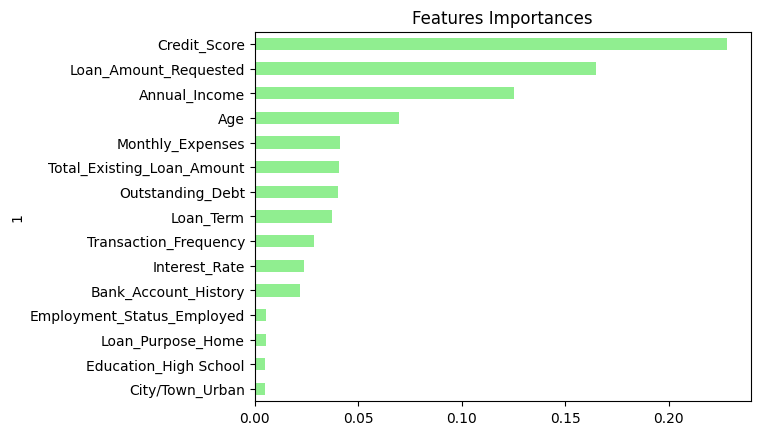

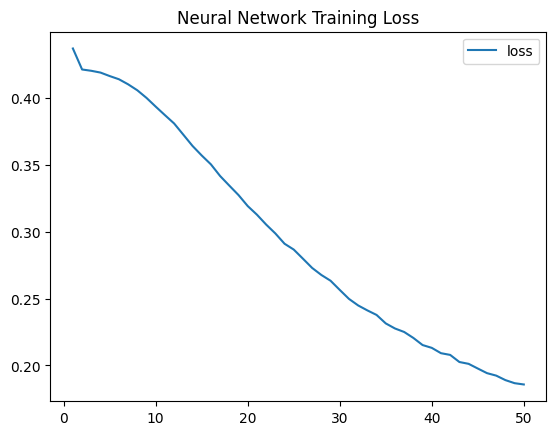

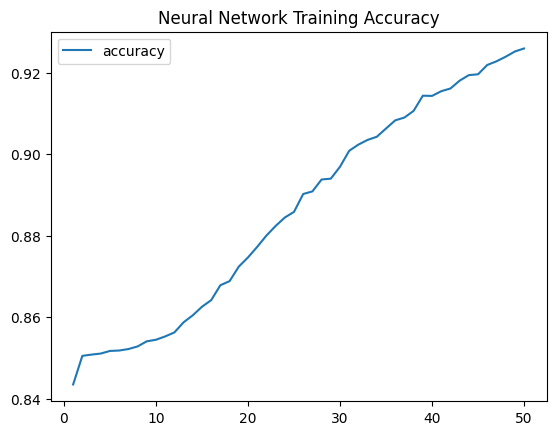

In [71]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Adjust index to match epoch count
history_df.index += 1

# Plot training loss over epochs
history_df.plot(y="loss", title="Neural Network Training Loss")
plt.show()

# Plot training accuracy over epochs
history_df.plot(y="accuracy", title="Neural Network Training Accuracy")
plt.show()

# Feature Importance Visualization (Random Forest)

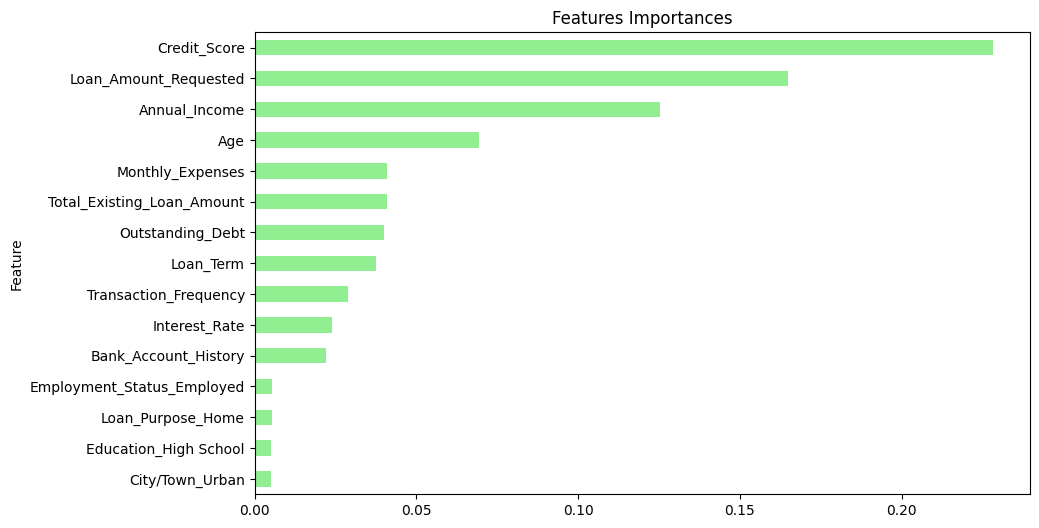

In [72]:
# Create a DataFrame of feature importances
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))

# Set column names for clarity
importances_df.columns = ["Feature Importance", "Feature"]

# Sort by importance and set index for visualization
importances_df.set_index("Feature", inplace=True)

# Plot the top 15 most important features
plt.figure(figsize=(10, 6))
importances_df.iloc[:15]["Feature Importance"].plot(kind="barh", color="lightgreen", title="Features Importances")

# Invert y-axis for better readability (most important features at the top)
plt.gca().invert_yaxis()

# Display the chart
plt.show()

# Save the Deep Learning Model

In [73]:
nn.save("LoanApproval_ML.h5")



# Close SQL Connection

In [74]:
conn.close()